In [3]:
import numpy as np
import pandas as pd

from subprocess import check_output
print check_output(["ls", "../input"]).decode("utf8")

.DS_Store
data_description.webarchive
sample_submission.csv
test.csv
train.csv



In [38]:
df = pd.read_csv("../input/test.csv")
df.describe()



,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1459.000000,1232.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1444.000000,1458.000000,...,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,2190.000000,57.378341,68.580357,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.709141,439.203704,...,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,421.321334,42.746880,22.376841,4955.517327,1.436812,1.113740,30.390071,21.130467,177.625900,455.268042,...,217.048611,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,1461.000000,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,1825.500000,20.000000,58.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,...,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,2190.000000,50.000000,67.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.500000,...,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2554.500000,70.000000,80.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,753.500000,...,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2919.000000,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,...,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


In [4]:
df = pd.read_csv("../input/train.csv")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [4]:
df.columns

Index([u'Id', u'MSSubClass', u'MSZoning', u'LotFrontage', u'LotArea',
       u'Street', u'Alley', u'LotShape', u'LandContour', u'Utilities',
       u'LotConfig', u'LandSlope', u'Neighborhood', u'Condition1',
       u'Condition2', u'BldgType', u'HouseStyle', u'OverallQual',
       u'OverallCond', u'YearBuilt', u'YearRemodAdd', u'RoofStyle',
       u'RoofMatl', u'Exterior1st', u'Exterior2nd', u'MasVnrType',
       u'MasVnrArea', u'ExterQual', u'ExterCond', u'Foundation', u'BsmtQual',
       u'BsmtCond', u'BsmtExposure', u'BsmtFinType1', u'BsmtFinSF1',
       u'BsmtFinType2', u'BsmtFinSF2', u'BsmtUnfSF', u'TotalBsmtSF',
       u'Heating', u'HeatingQC', u'CentralAir', u'Electrical', u'1stFlrSF',
       u'2ndFlrSF', u'LowQualFinSF', u'GrLivArea', u'BsmtFullBath',
       u'BsmtHalfBath', u'FullBath', u'HalfBath', u'BedroomAbvGr',
       u'KitchenAbvGr', u'KitchenQual', u'TotRmsAbvGrd', u'Functional',
       u'Fireplaces', u'FireplaceQu', u'GarageType', u'GarageYrBlt',
       u'GarageFinish',

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

/Users/shawn/Documents/workspace/kaggle/Facial-Keypoints-Detection/ENV/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [6]:
print "Some Statistics of the Housing Price:\n"
print(df['SalePrice'].describe())
print "\nThe median of the Housing Price is: ", df['SalePrice'].median(axis = 0)


Some Statistics of the Housing Price:

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

The median of the Housing Price is:  163000.0


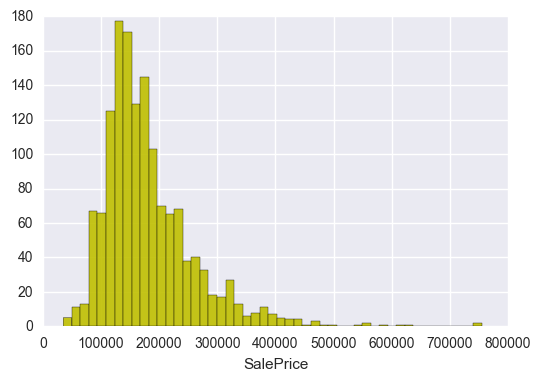

In [7]:
sns.distplot(df['SalePrice'], kde = False, color = 'y', hist_kws={'alpha': 0.9})

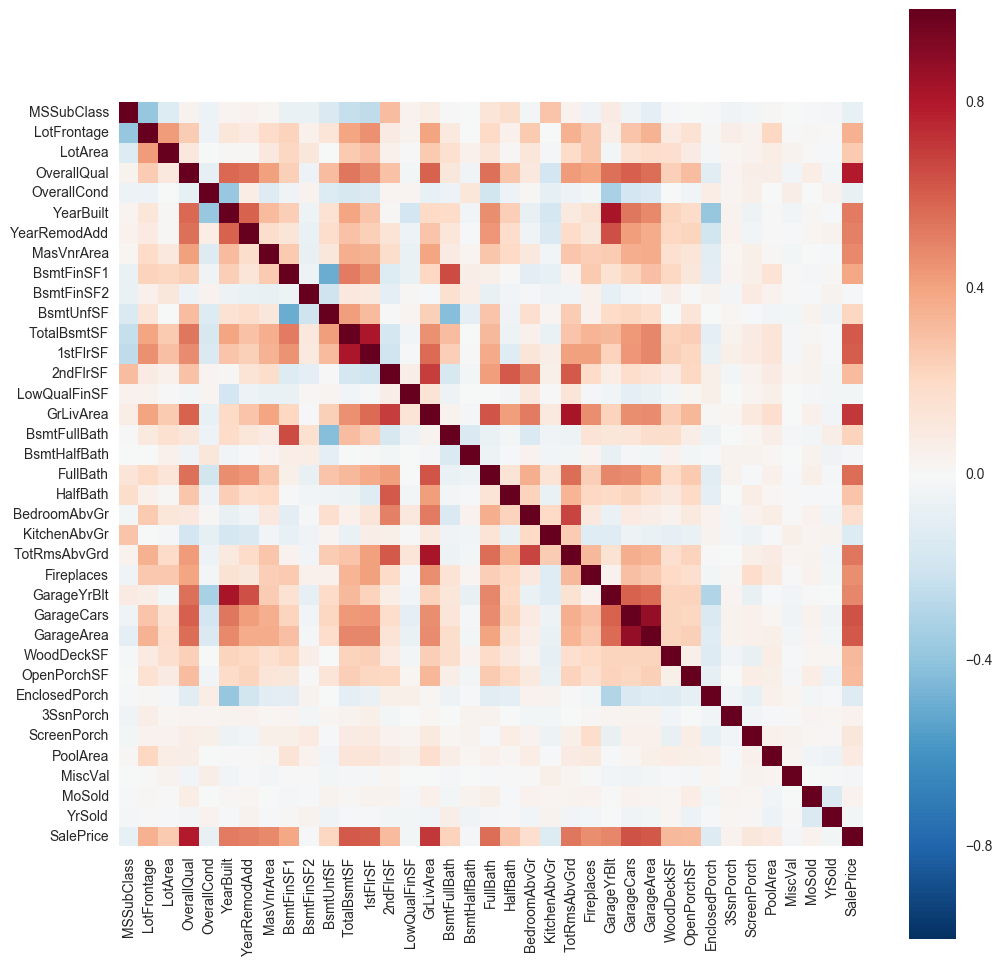

In [8]:
corr = df.select_dtypes(include = ['float64', 'int64']).iloc[:, 1:].corr()
plt.figure(figsize = (12,12))
sns.heatmap(corr, vmax=1, square=True)

In [9]:
cor_dict = corr['SalePrice'].to_dict()
del cor_dict['SalePrice']
print "List the numerical features decendingly by their correlation with Sale Price:\n"
for ele in sorted(cor_dict.items(), key = lambda x: -abs(x[1])):
    print "{0}: \t{1}".format(*ele)

List the numerical features decendingly by their correlation with Sale Price:

OverallQual: 	0.790981600584
GrLivArea: 	0.708624477613
GarageCars: 	0.640409197258
GarageArea: 	0.623431438918
TotalBsmtSF: 	0.613580551559
1stFlrSF: 	0.605852184692
FullBath: 	0.560663762748
TotRmsAbvGrd: 	0.533723155582
YearBuilt: 	0.522897332879
YearRemodAdd: 	0.507100967111
GarageYrBlt: 	0.486361677488
MasVnrArea: 	0.477493047096
Fireplaces: 	0.466928836752
BsmtFinSF1: 	0.386419806242
LotFrontage: 	0.351799096571
WoodDeckSF: 	0.324413444568
2ndFlrSF: 	0.319333802832
OpenPorchSF: 	0.315856227116
HalfBath: 	0.284107675595
LotArea: 	0.263843353871
BsmtFullBath: 	0.227122233131
BsmtUnfSF: 	0.214479105547
BedroomAbvGr: 	0.168213154301
KitchenAbvGr: 	-0.135907370842
EnclosedPorch: 	-0.128577957926
ScreenPorch: 	0.111446571143
PoolArea: 	0.0924035494919
MSSubClass: 	-0.0842841351266
OverallCond: 	-0.0778558940487
MoSold: 	0.0464322452238
3SsnPorch: 	0.0445836653357
YrSold: 	-0.0289225851687
LowQualFinSF: 	-0.0

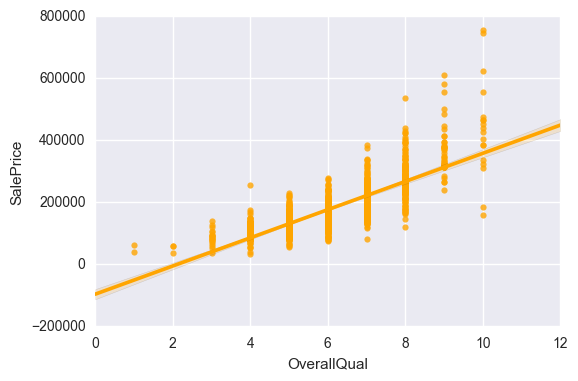

In [10]:
sns.regplot(x = 'OverallQual', y = 'SalePrice', data = df, color = 'orange')

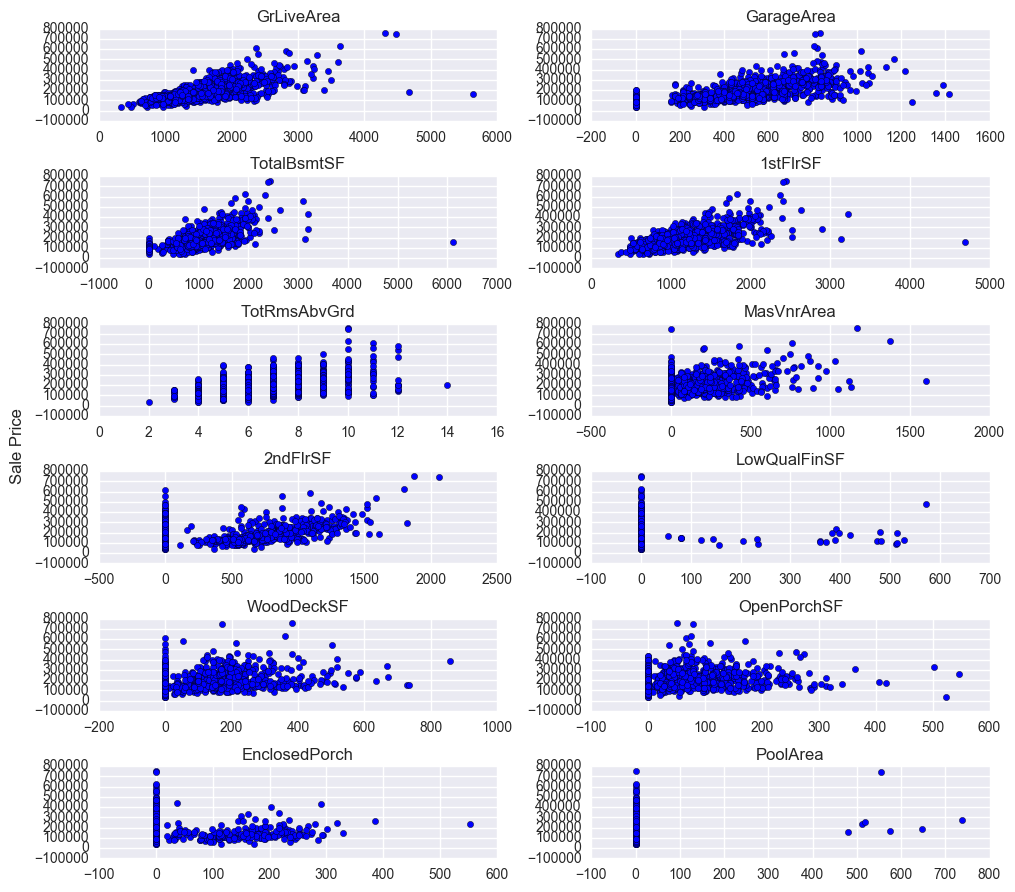

In [42]:
plt.figure(1)
f, axarr = plt.subplots(6, 2, figsize=(10,9))
price = df.SalePrice.values

axarr[0, 0].scatter(df.GrLivArea.values, price)
axarr[0, 0].set_title('GrLiveArea')
axarr[0, 1].scatter(df.GarageArea.values, price)
axarr[0, 1].set_title('GarageArea')
axarr[1, 0].scatter(df.TotalBsmtSF.values, price)
axarr[1, 0].set_title('TotalBsmtSF')
axarr[1, 1].scatter(df['1stFlrSF'].values, price)
axarr[1, 1].set_title('1stFlrSF')
axarr[2, 0].scatter(df.TotRmsAbvGrd.values, price)
axarr[2, 0].set_title('TotRmsAbvGrd')
axarr[2, 1].scatter(df.MasVnrArea.values, price)
axarr[2, 1].set_title('MasVnrArea')
axarr[3, 0].scatter(df['2ndFlrSF'].values, price)
axarr[3, 0].set_title('2ndFlrSF')
axarr[3, 1].scatter(df.LowQualFinSF.values, price)
axarr[3, 1].set_title('LowQualFinSF')
axarr[4, 0].scatter(df.WoodDeckSF.values, price)
axarr[4, 0].set_title('WoodDeckSF')
axarr[4, 1].scatter(df.OpenPorchSF.values, price)
axarr[4, 1].set_title('OpenPorchSF')
axarr[5, 0].scatter(df.EnclosedPorch.values, price)
axarr[5, 0].set_title('EnclosedPorch')
axarr[5, 1].scatter(df.PoolArea.values, price)
axarr[5, 1].set_title('PoolArea')



f.text(-0.01, 0.5, 'Sale Price', va='center', rotation='vertical', fontsize = 12)
plt.tight_layout()
plt.show()


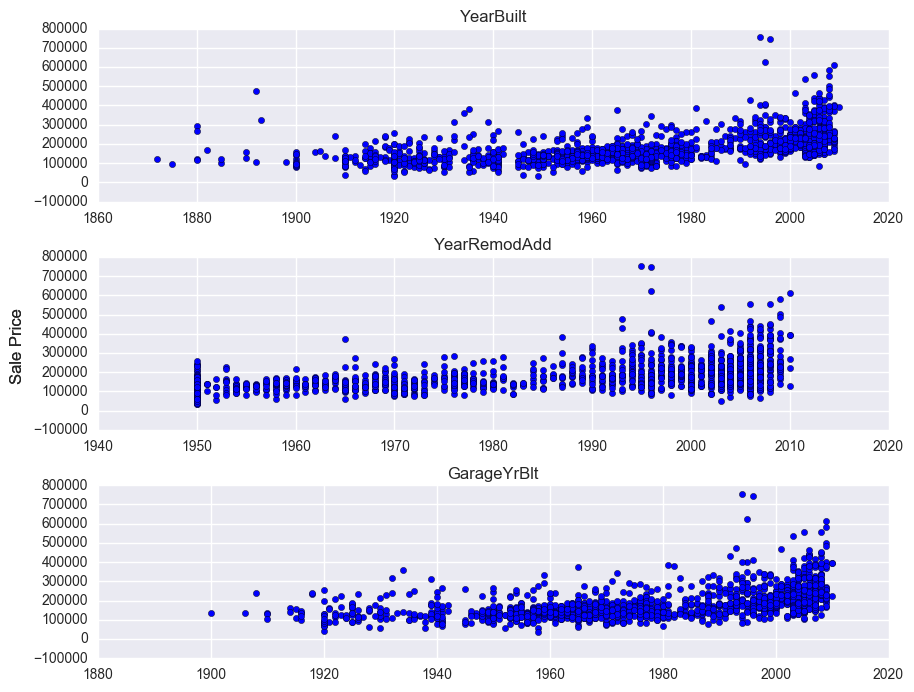

In [44]:
fig = plt.figure(3, figsize=(9, 7))
plt.subplot(311)
plt.scatter(df.YearBuilt.values, price)
plt.title('YearBuilt')

plt.subplot(312)
plt.scatter(df.YearRemodAdd.values, price)
plt.title('YearRemodAdd')
fig.text(-0.01, 0.5, 'Sale Price', va = 'center', rotation = 'vertical', fontsize = 12)

plt.subplot(313)
plt.scatter(df.GarageYrBlt.values, price)
plt.title('GarageYrBlt')
fig.text(-0.01, 0.5, 'Sale Price', va = 'center', rotation = 'vertical', fontsize = 12)

plt.tight_layout()


In [45]:
# categorical Features
print df.select_dtypes(include=['object']).columns.values
print len(df.select_dtypes(include=['object']).columns.values)

['MSZoning' 'Street' 'Alley' 'LotShape' 'LandContour' 'Utilities'
 'LotConfig' 'LandSlope' 'Neighborhood' 'Condition1' 'Condition2'
 'BldgType' 'HouseStyle' 'RoofStyle' 'RoofMatl' 'Exterior1st' 'Exterior2nd'
 'MasVnrType' 'ExterQual' 'ExterCond' 'Foundation' 'BsmtQual' 'BsmtCond'
 'BsmtExposure' 'BsmtFinType1' 'BsmtFinType2' 'Heating' 'HeatingQC'
 'CentralAir' 'Electrical' 'KitchenQual' 'Functional' 'FireplaceQu'
 'GarageType' 'GarageFinish' 'GarageQual' 'GarageCond' 'PavedDrive'
 'PoolQC' 'Fence' 'MiscFeature' 'SaleType' 'SaleCondition']
43


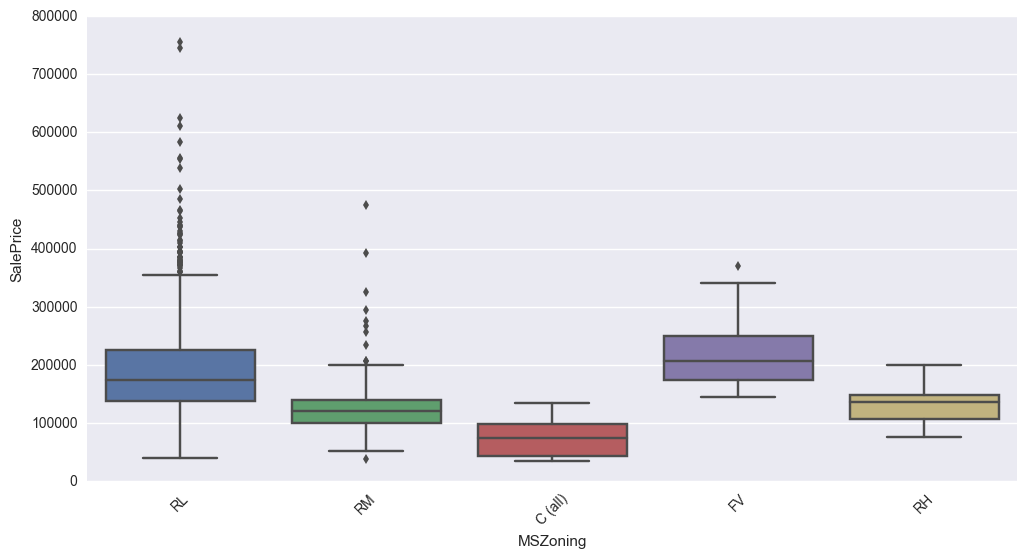

In [49]:
plt.figure(figsize = (12, 6))
# sns.boxplot(x = 'Condition1', y = 'SalePrice', data = df)
sns.boxplot(x = 'MSZoning', y = 'SalePrice', data = df)

xt = plt.xticks(rotation = 45)

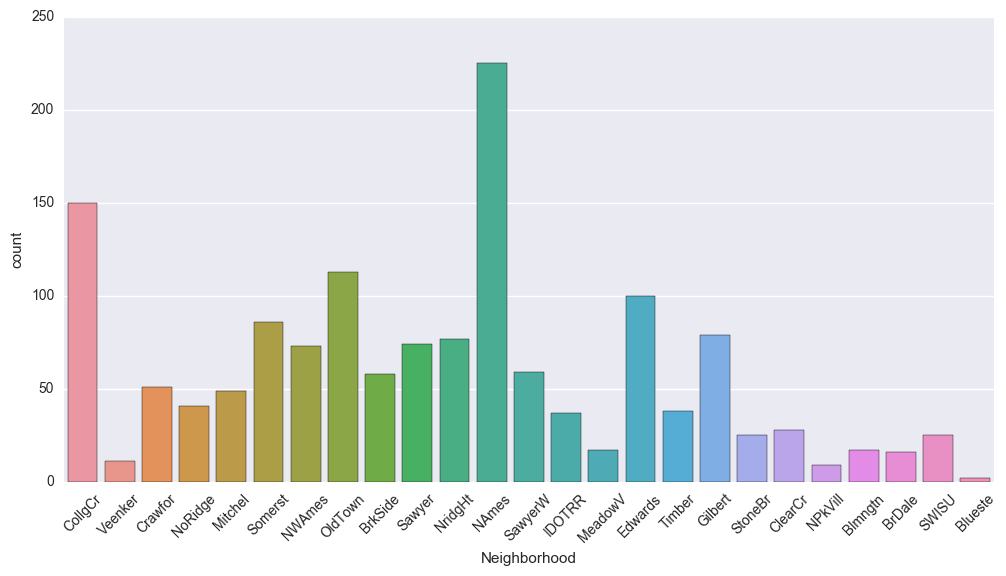

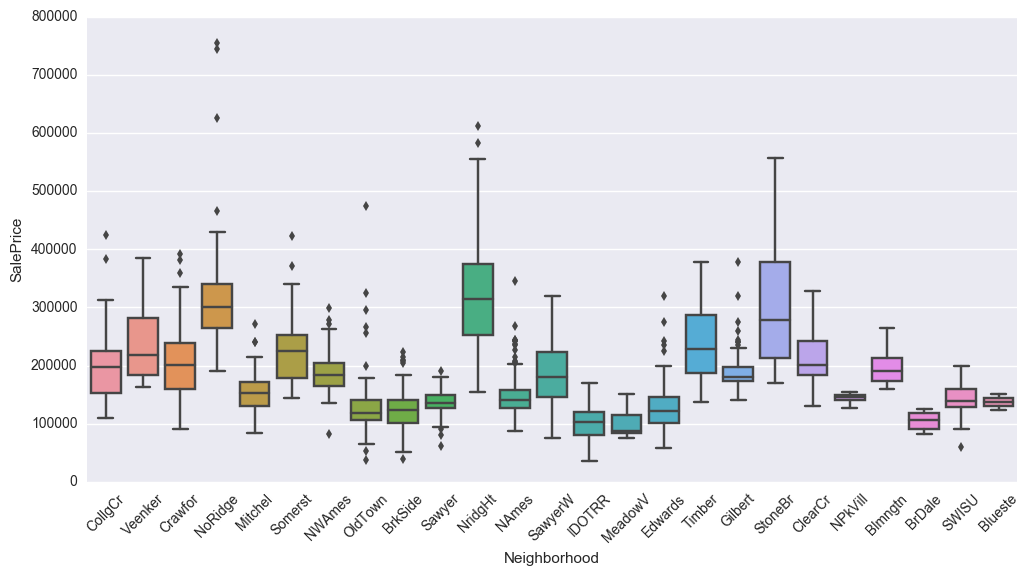

In [51]:
plt.figure(figsize = (12, 6))
sns.countplot(x = 'Neighborhood', data = df)
xt = plt.xticks(rotation=45)

plt.figure(figsize = (12, 6))
sns.boxplot(x = 'Neighborhood', y = 'SalePrice', data = df)
xt = plt.xticks(rotation=45)




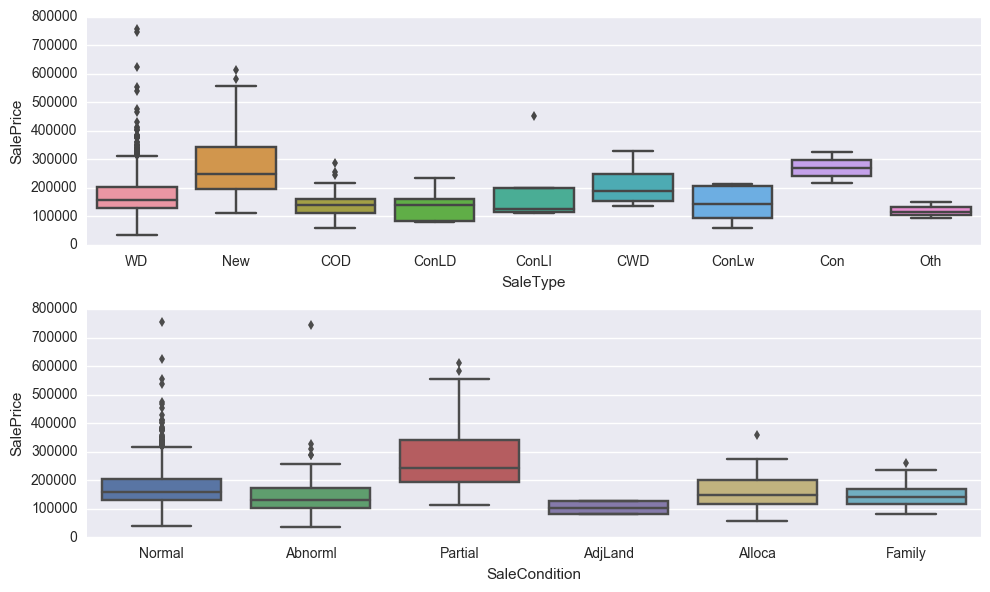

In [16]:
# housing price vs Sales
# Sale type & condition
# Sales Seasonality

fig, ax = plt.subplots(2, 1, figsize = (10, 6))
sns.boxplot(x = 'SaleType', y = 'SalePrice', data = df, ax = ax[0])
sns.boxplot(x = 'SaleCondition', y = 'SalePrice', data = df, ax = ax[1])
plt.tight_layout()

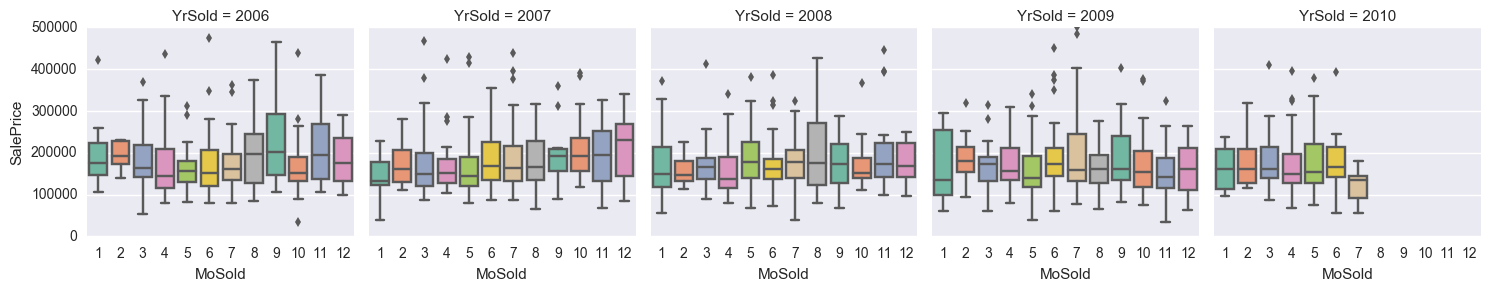

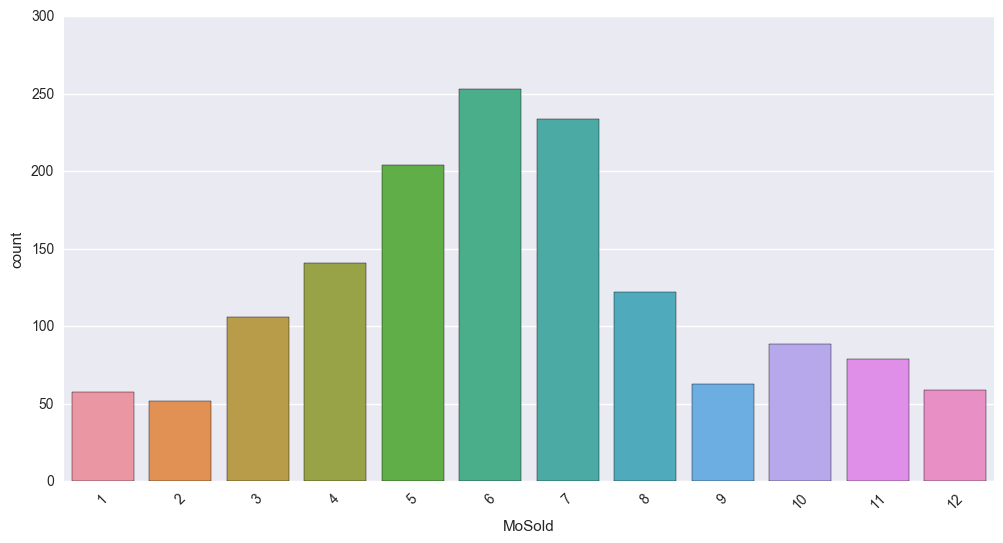

In [52]:
g = sns.FacetGrid(df, col = 'YrSold', col_wrap = 5)
g.map(sns.boxplot, 'MoSold', 'SalePrice', palette='Set2', order = range(1, 13)).set(ylim=(0, 500000))
plt.tight_layout()

plt.figure(figsize = (12, 6))
sns.countplot(x = 'MoSold', data = df)
xt = plt.xticks(rotation=45)

(100000, 240000)

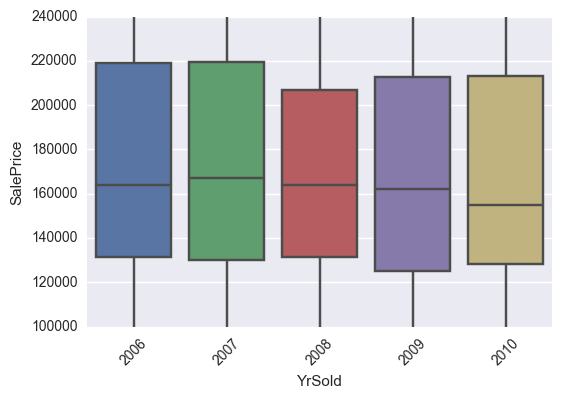

In [87]:
# plt.figure(figsize = (12, 6))
sns.boxplot(x='YrSold', y='SalePrice', data=df)
xt = plt.xticks(rotation=45)
plt.ylim(100000, 240000)

# plt.show()

# print df.YrSold.values

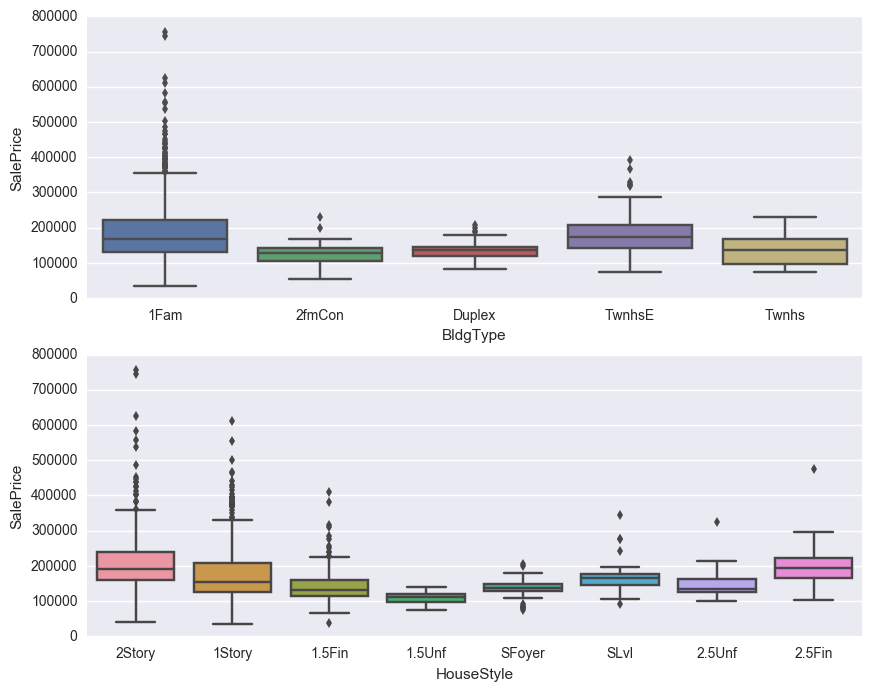

In [18]:
# Housing Style
fig, ax = plt.subplots(2, 1, figsize=(10, 8))
sns.boxplot(x='BldgType', y='SalePrice', data=df, ax=ax[0])
sns.boxplot(x='HouseStyle', y='SalePrice', data=df, ax=ax[1])



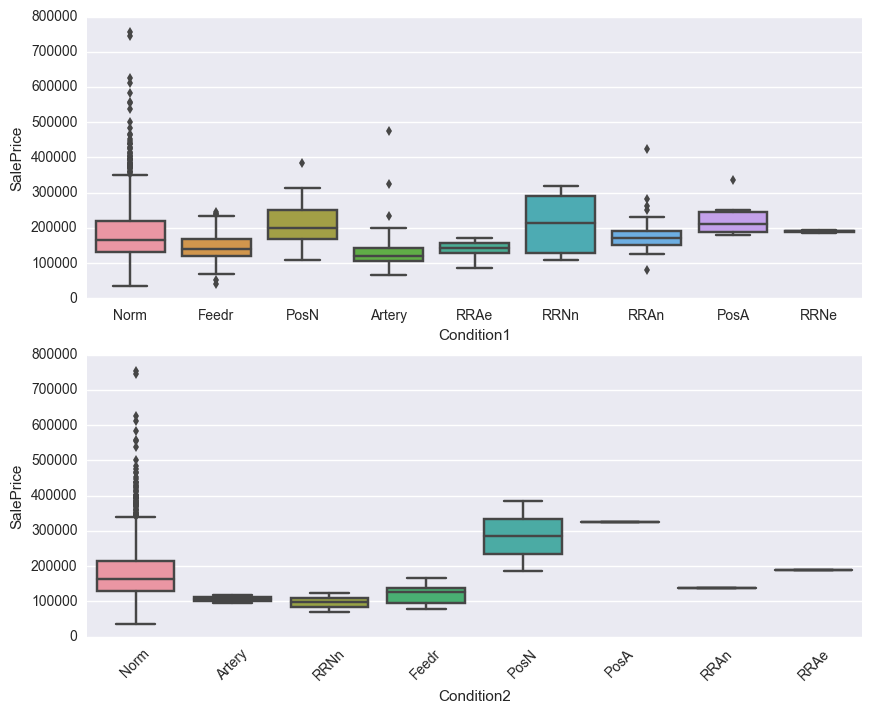

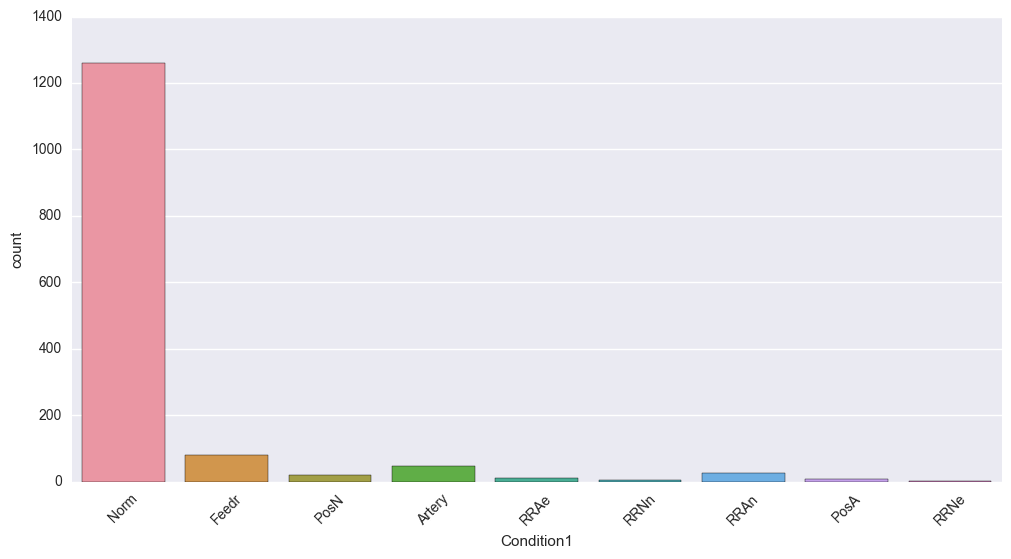

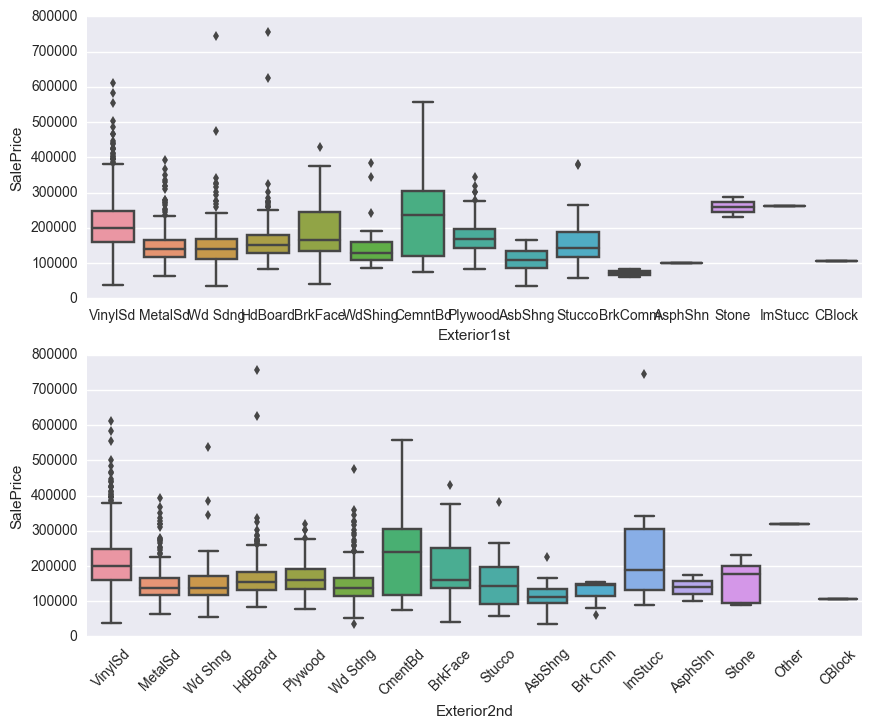

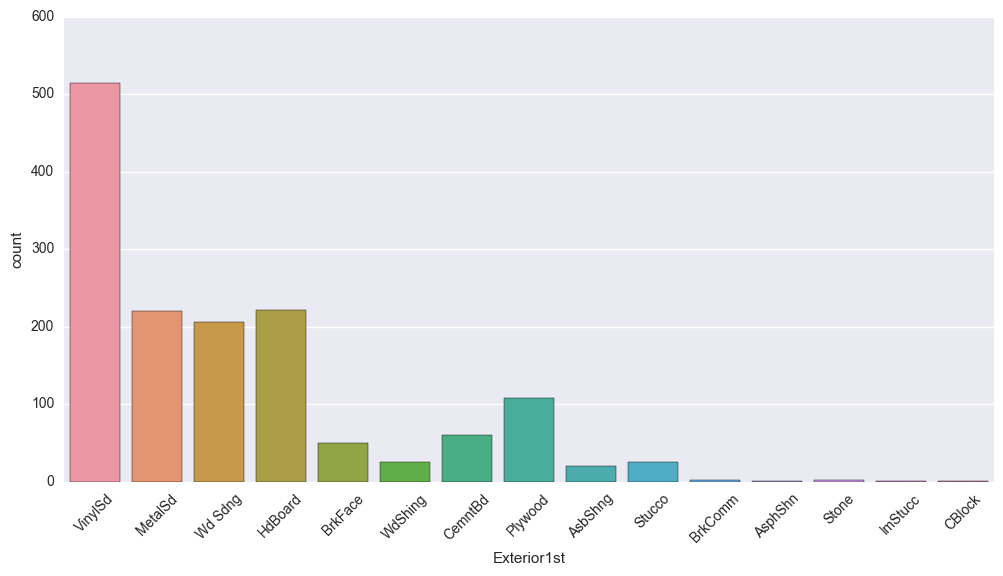

In [59]:
# Proximity to main road or railroad
fig, ax = plt.subplots(2, 1, figsize = (10, 8))
sns.boxplot(x = 'Condition1', y = 'SalePrice', data = df, ax = ax[0])
sns.boxplot(x = 'Condition2', y = 'SalePrice', data = df, ax = ax[1])
x = plt.xticks(rotation = 45)
plt.show()

plt.figure(figsize = (12, 6))
sns.countplot(x = 'Condition1', data = df)
xt = plt.xticks(rotation=45)
plt.show()


fig, ax = plt.subplots(2, 1, figsize = (10, 8))
sns.boxplot(x = 'Exterior1st', y = 'SalePrice', data = df, ax = ax[0])
sns.boxplot(x = 'Exterior2nd', y = 'SalePrice', data = df, ax = ax[1])
x = plt.xticks(rotation = 45)
plt.show()

plt.figure(figsize = (12, 6))
sns.countplot(x = 'Exterior1st', data = df)
xt = plt.xticks(rotation=45)
plt.show()

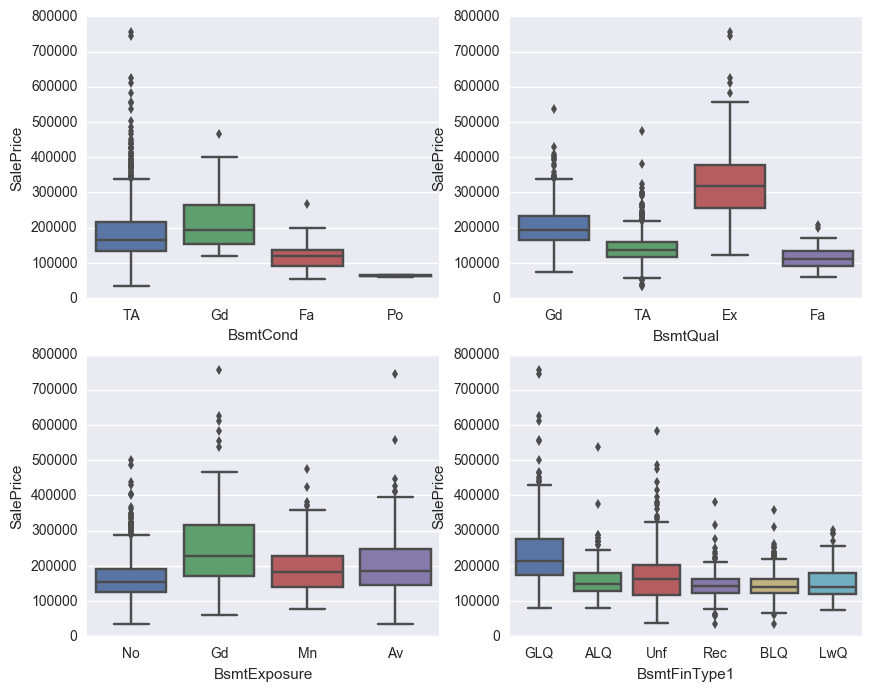

In [20]:
# Basement Conditions
fig, ax = plt.subplots(2, 2, figsize = (10, 8))
sns.boxplot('BsmtCond', 'SalePrice', data = df, ax = ax[0, 0])
sns.boxplot('BsmtQual', 'SalePrice', data = df, ax = ax[0, 1])
sns.boxplot('BsmtExposure', 'SalePrice', data = df, ax = ax[1, 0])
sns.boxplot('BsmtFinType1', 'SalePrice', data = df, ax = ax[1, 1])


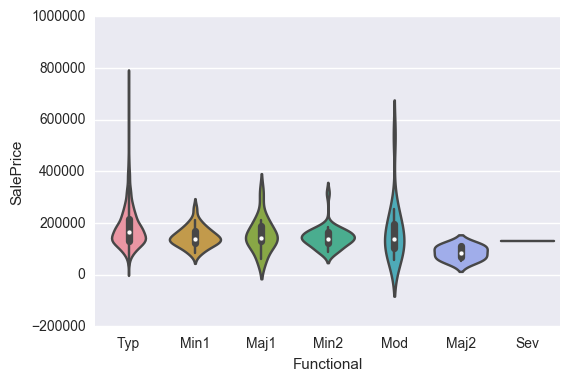

In [62]:
# Home Functionality
sns.violinplot('Functional', 'SalePrice', data = df)


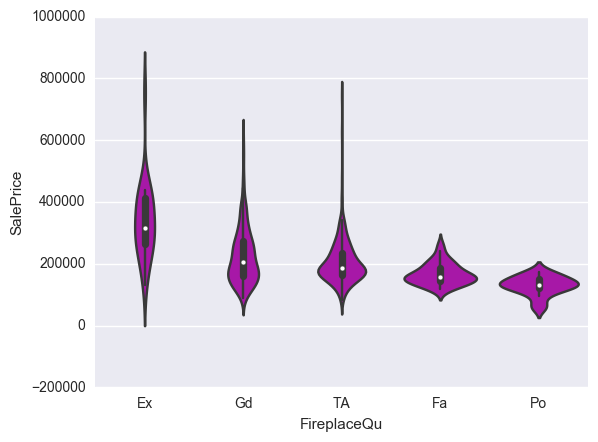

In [71]:
# FirePlaceQu

sns.factorplot('FireplaceQu', 'SalePrice', data = df, kind = 'violin', color = 'm', \
               estimator = np.median, order = ['Ex', 'Gd', 'TA', 'Fa', 'Po'], size = 4.5,  aspect=1.35)

# sns.violinplot('FireplaceQu', 'SalePrice', data = df)



In [23]:
pd.crosstab(df.Fireplaces, df.FireplaceQu)

FireplaceQu,Ex,Fa,Gd,Po,TA
Fireplaces,,,,,
1,19,28,324,20,259
2,4,4,54,0,53
3,1,1,2,0,1


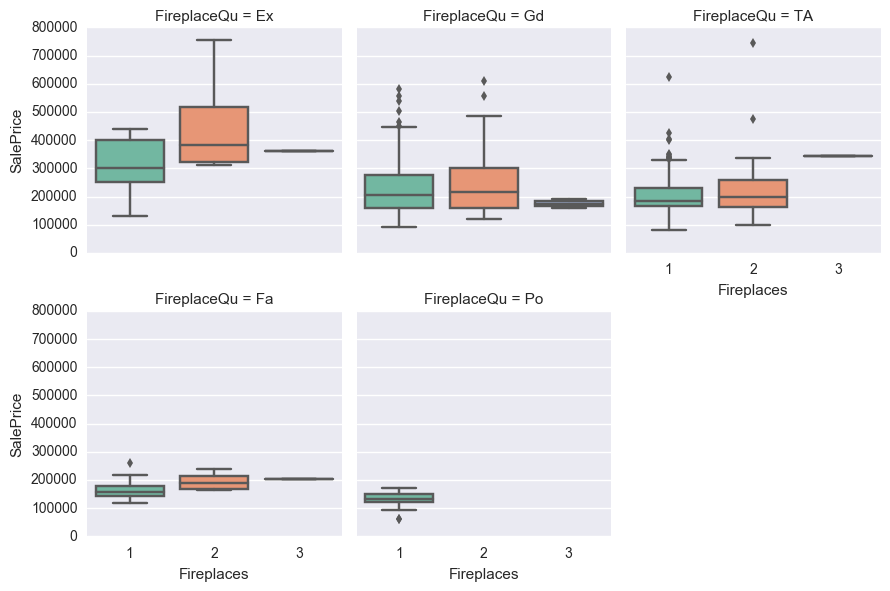

In [24]:
g = sns.FacetGrid(df, col = 'FireplaceQu', col_wrap = 3, col_order=['Ex', 'Gd', 'TA', 'Fa', 'Po'])
g.map(sns.boxplot, 'Fireplaces', 'SalePrice', order = [1, 2, 3], palette = 'Set2')


In [25]:
# Heating
# Ames is a cold place in winter, so heating (as well as fireplace qualities) are quite important.
pd.crosstab(df.HeatingQC, df.CentralAir)

CentralAir,N,Y
HeatingQC,,
Ex,8,733
Fa,24,25
Gd,13,228
Po,1,0
TA,49,379


In [26]:
pd.crosstab(df.HeatingQC, df.FireplaceQu)

FireplaceQu,Ex,Fa,Gd,Po,TA
HeatingQC,,,,,
Ex,22,14,254,4,160
Fa,0,1,13,1,5
Gd,2,3,45,5,57
TA,0,15,68,10,91


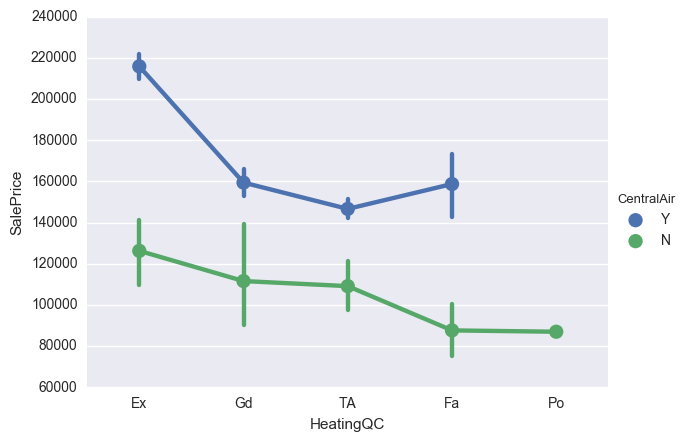

In [27]:
sns.factorplot('HeatingQC', 'SalePrice', hue = 'CentralAir', estimator = np.mean, data = df, 
             size = 4.5, aspect = 1.4)

# Clearly, having AC or not has a big impact on housing price.


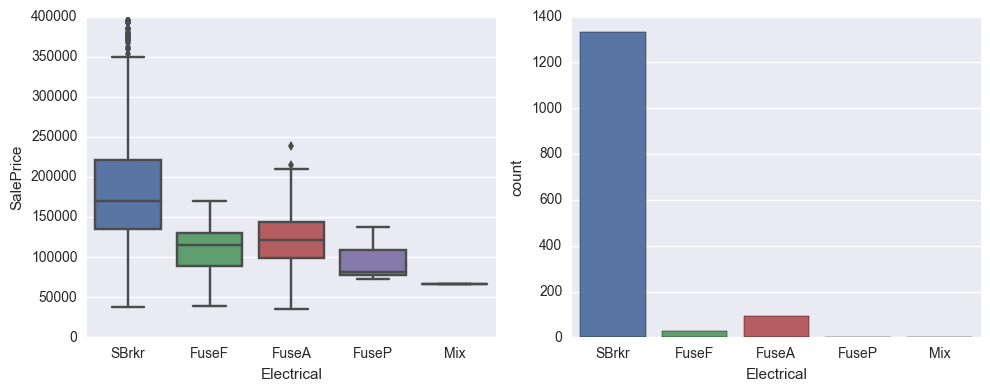

In [28]:
fig, ax = plt.subplots(1, 2, figsize = (10, 4))
sns.boxplot('Electrical', 'SalePrice', data = df, ax = ax[0]).set(ylim = (0, 400000))
sns.countplot('Electrical', data = df)
plt.tight_layout()


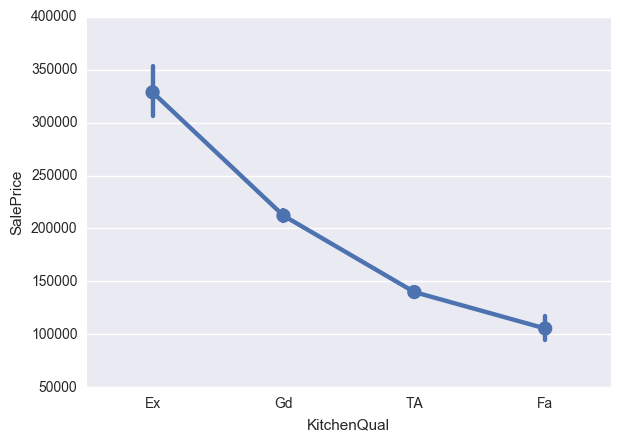

In [76]:
# Kitchen Quality
# fig, ax = plt.subplots(1, 2, figsize = (10, 4))
sns.factorplot('KitchenQual', 'SalePrice', estimator = np.mean, 
               size = 4.5, aspect = 1.4, data = df, order = ['Ex', 'Gd', 'TA', 'Fa'])
# plt.tight_layout()


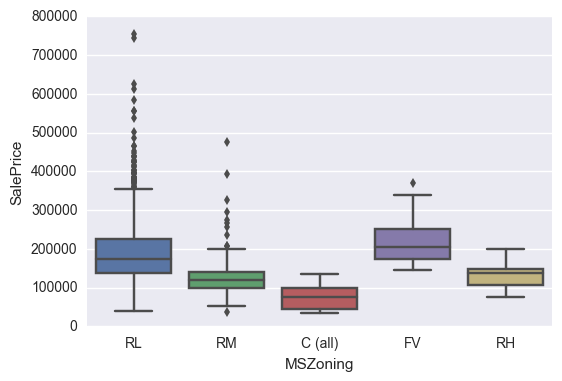

In [30]:
# MSZonig
sns.boxplot(x = 'MSZoning', y = 'SalePrice', data = df)

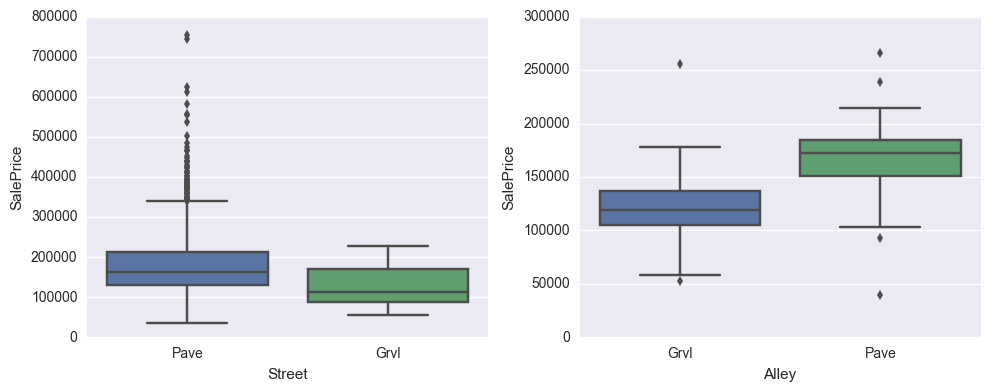

In [31]:
# Street & Alley Access
fig, ax = plt.subplots(1, 2, figsize = (10, 4))
sns.boxplot(x = 'Street', y = 'SalePrice', data = df, ax = ax[0])
sns.boxplot(x = 'Alley', y = 'SalePrice', data = df, ax = ax[1])
plt.tight_layout()


In [32]:
print("The NA's in Alley is: ", df['Alley'].isnull().sum())
print("\nThere are so many NA's in Alley. When Alley is NA, Street = ", 
      df[df.Alley.notnull()].Street.unique())
print("\n", pd.crosstab(df.Street, df.Alley))


("The NA's in Alley is: ", 1369)
("\nThere are so many NA's in Alley. When Alley is NA, Street = ", array(['Pave'], dtype=object))
('\n', Alley   Grvl  Pave
Street            
Pave      50    41)


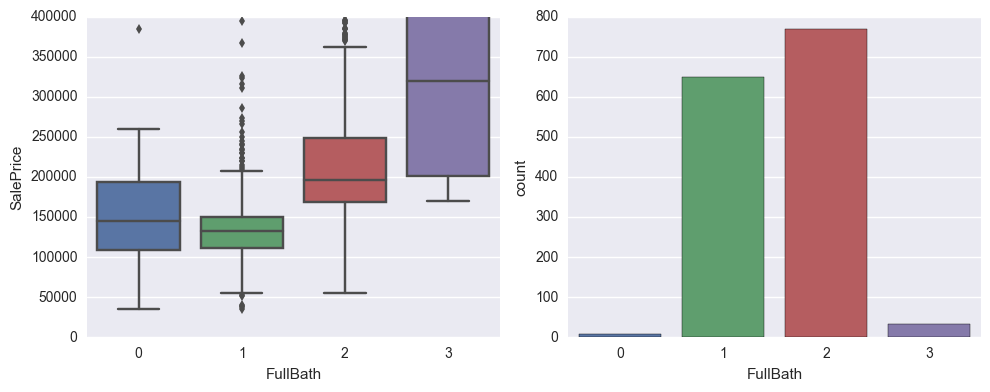

In [78]:
# print df.FullBath
fig, ax = plt.subplots(1, 2, figsize = (10, 4))
sns.boxplot('FullBath', 'SalePrice', data = df, ax = ax[0]).set(ylim = (0, 400000))
sns.countplot('FullBath', data = df)
plt.tight_layout()

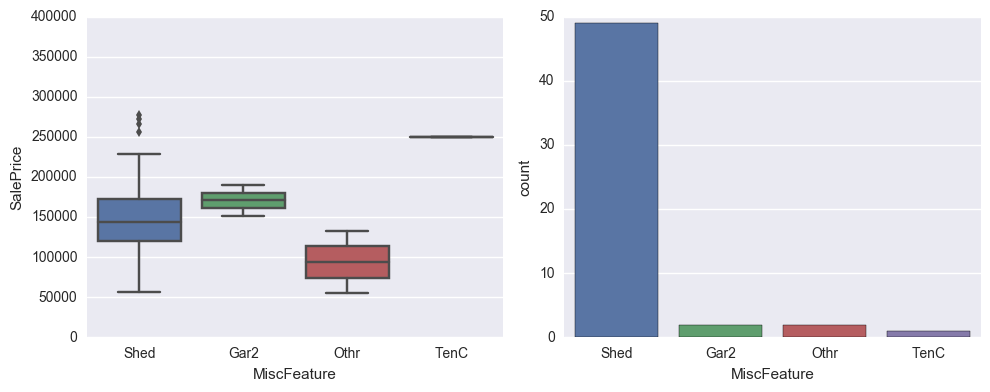

In [79]:
fig, ax = plt.subplots(1, 2, figsize = (10, 4))
sns.boxplot('MiscFeature', 'SalePrice', data = df, ax = ax[0]).set(ylim = (0, 400000))
sns.countplot('MiscFeature', data = df)
plt.tight_layout()

In [31]:
# may need to drop those outliers

print df[df["GrLivArea"] >4000]
print df[df["EnclosedPorch"] >500]
print df[df["1stFlrSF"] >4000]

# neighborhood SalePrice



# Neighborhood = df["SalePrice"].groupby(df["Neighborhood"]).median().sort_values()

new_df = df.copy()

# new_df["Neighborhood"] = new_df.Neighborhood.replace(Neighborhood)

# df["SalePrice"].groupby(df["ExterQual"]).median().sort_values()

quality_feats = ["ExterQual", "ExterCond", "BsmtQual","BsmtCond","HeatingQC","KitchenQual","FireplaceQu","GarageQual","GarageCond","BsmtExposure","BsmtFinType1","BsmtFinType2"]

for feature in quality_feats:
    dic = df["SalePrice"].groupby(df[feature]).mean().sort_values()
    print dic
    new_df[feature] = new_df[feature].replace()

    
print set(new_df.RoofMatl)

print new_df.PID

        Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
523    524          60       RL        130.0    40094   Pave   NaN      IR1   
691    692          60       RL        104.0    21535   Pave   NaN      IR1   
1182  1183          60       RL        160.0    15623   Pave   NaN      IR1   
1298  1299          60       RL        313.0    63887   Pave   NaN      IR3   

     LandContour Utilities    ...     PoolArea PoolQC  Fence MiscFeature  \
523          Bnk    AllPub    ...            0    NaN    NaN         NaN   
691          Lvl    AllPub    ...            0    NaN    NaN         NaN   
1182         Lvl    AllPub    ...          555     Ex  MnPrv         NaN   
1298         Bnk    AllPub    ...          480     Gd    NaN         NaN   

     MiscVal MoSold YrSold  SaleType  SaleCondition  SalePrice  
523        0     10   2007       New        Partial     184750  
691        0      1   2007        WD         Normal     755000  
1182       0      7   2007  

AttributeError: 'DataFrame' object has no attribute 'PID'